In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simple_env import Simulator
import pickle
# import gym
#import gym_trading


In [2]:
# data_path = '/nfs/home/zihaoz/rl_optimal_exe/data/sample_v1.csv'
# raw_data = pd.read_csv(data_path)
# data = raw_data.copy()
# data = data.drop(['#RIC', 'Domain', 'GMT Offset', 'Type', 'L1-BuyNo', 'L1-SellNo', 'L2-BuyNo', 'L2-SellNo',
#                               'L3-BuyNo', 'L3-SellNo', 'L4-BuyNo', 'L4-SellNo', 'L5-BuyNo', 'L5-SellNo',
#                               'L6-BuyNo', 'L6-SellNo', 'L7-BuyNo',  'L7-SellNo', 'L8-BuyNo', 'L8-SellNo',
#                               'L9-BuyNo', 'L9-SellNo', 'L10-BuyNo', 'L10-SellNo'], axis=1)
# data['Date-Time'] = pd.to_datetime(data['Date-Time'],
#                                              format='%Y-%m-%dT%H:%M:%S.%fZ').dt.round('{}s'.format(600))

# data = data.groupby(['Date-Time']).first().reset_index()
# data['Day'] = data['Date-Time'].dt.dayofweek
# data = data.drop(data.loc[(data['Day'] == 5) | (data['Day'] == 6)].index)
# data['Hour'] = data['Date-Time'].dt.hour
# data['Minute'] = data['Date-Time'].dt.minute
# data = data.drop(data.loc[(data['Hour'] < 8) | (data['Hour'] > 16)].index)
# data = data.drop(['Hour', 'Minute', 'Day'], axis=1)
# pickle.dump( data, open( "/nfs/home/zihaoz/rl_optimal_exe/data/data.p", "wb" ) )

In [3]:
data = pickle.load( open( "/nfs/home/zihaoz/rl_optimal_exe/data/data.p", "rb" ) )

In [22]:
all_state = []
all_reward = []

env = Simulator(data)
state = env.reset(num_days=0)
all_state.append(np.array(state))

done=False

while done==False:
    next_state, reward, done, _ = env.step(1)      
        
    if done == False:
        last_line = np.array(next_state[-1])
        last_line = last_line.reshape(1, 18)
        all_state.append(last_line)
            
    all_reward.append(reward)

In [ ]:
env = Simulator(data)
all_state = []
all_reward = []

In [ ]:
for i in range(9):
    state = env.reset(num_days=i)
    all_state.append(np.array(state))
    done=False

    while done==False:
        next_state, reward, done, _ = env.step(1)      
        
        if done == False:
            all_state.append(np.array(next_state))
            
        all_reward.append(reward)


In [27]:
all_state = np.vstack(all_state)
all_reward = np.array(all_reward)

print(all_state.shape, all_reward.shape)

(40, 18) (31,)


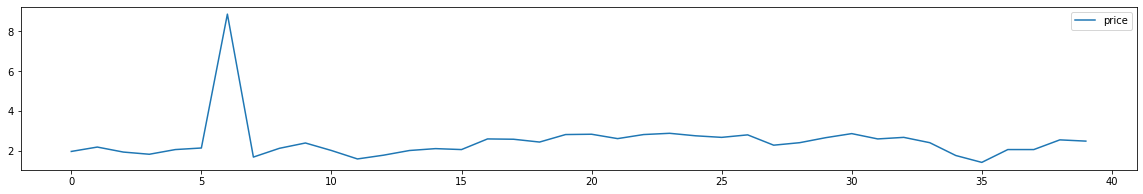

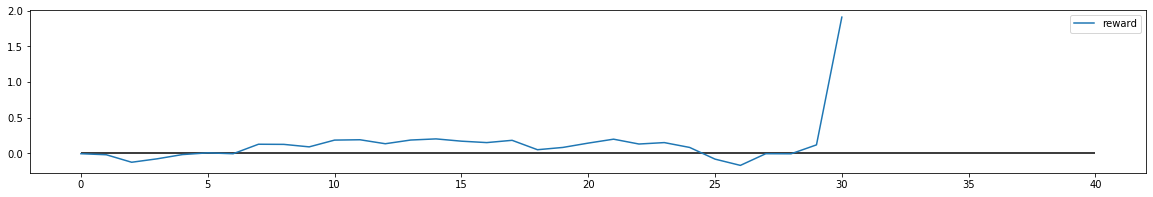

In [29]:
time_length = 40

plt.figure(figsize=(20,3))
plt.plot(all_state[:, 2][:time_length], label='price')
plt.legend()

plt.figure(figsize=(20,3))
plt.plot(all_reward[:time_length], label='reward')
plt.hlines(0,0,time_length)
plt.legend()




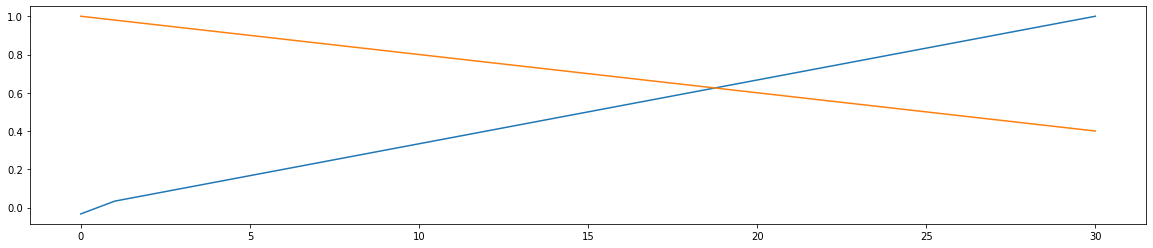

In [7]:
plt.figure(figsize=(20,4))
plt.plot(all_state[:,-1, 0])
plt.plot(all_state[:,-1,1])

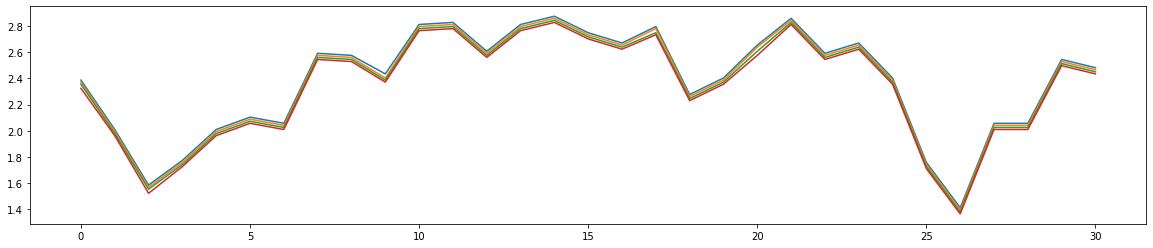

In [8]:
plt.figure(figsize=(20,4))
plt.plot(all_state[:,-1,2::4][:])


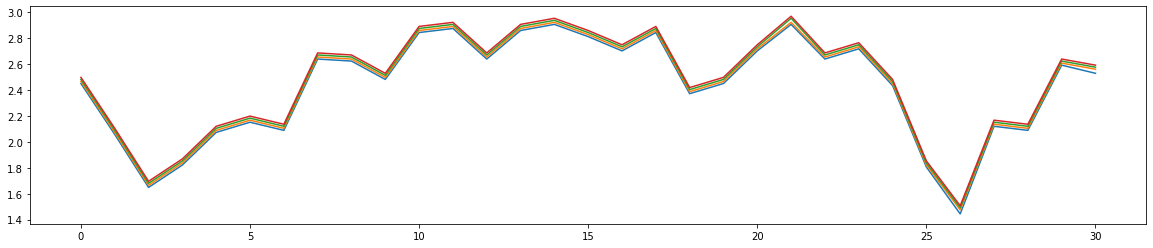

In [9]:
plt.figure(figsize=(20,4))
plt.plot(all_state[:,-1,3::4])

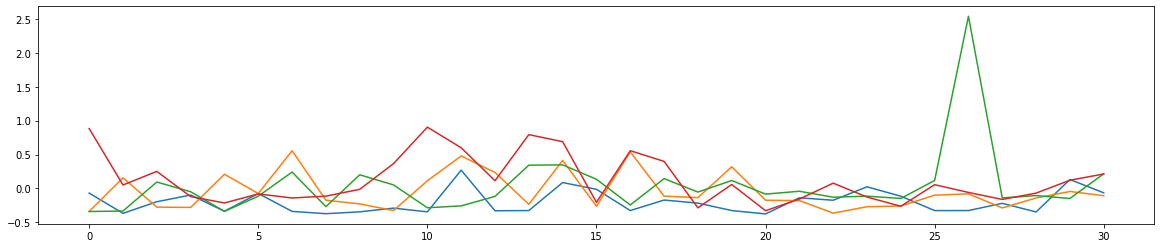

In [10]:
plt.figure(figsize=(20,4))
plt.plot(all_state[:,-1,4::4])

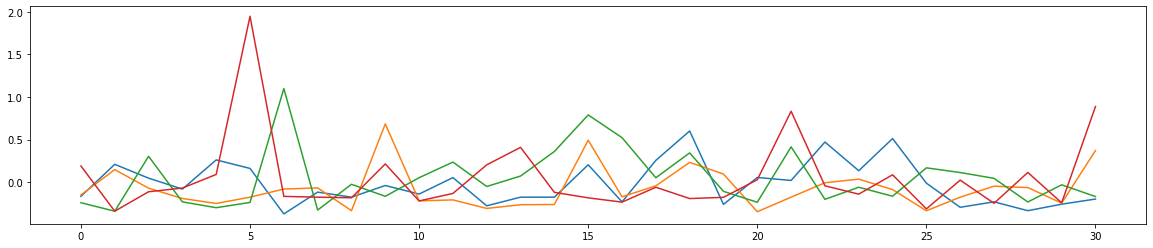

In [11]:
plt.figure(figsize=(20,4))
plt.plot(all_state[:,-1,5::4])